In [32]:
import itertools
import requests
import bs4
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import re

In [33]:
headers = {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:84.0) Gecko/20100101 Firefox/84.0'}


url = 'https://www.banki.ru/services/responses/bank/rshb/'

In [34]:
r = requests.get(url, headers=headers)
s = bs4.BeautifulSoup(r.content)

In [35]:
Resp = []
data_id = []



for page in itertools.count(start=1):
    url = f'https://www.banki.ru/services/responses/bank/rshb/?page={page}'
    print(f'Downloading page {page}')
    r = requests.get(url, headers=headers)
    s = bs4.BeautifulSoup(r.content)
    qst=s.find_all('div', {'class':'responses__item__message markup-inside-small markup-inside-small--bullet'})
    qst_id = s.find_all('article', {'class':'responses__item'})
    
    
    for x in qst_id:
        data_id.append(x['data-id'])
    
    for i in qst:
        responce =str(i)
        responce = responce.replace('n','')
        responce = responce.replace('<div class="resposes__item__message markup-iside-small markup-iside-small--bullet" data-test="resposes-message">\n\t\t\t\t\t\t\t','')
        responce = responce.replace('<div class="resposes__item__message markup-iside-small markup-iside-small--bullet" data-full="">\n\t\t\t\t\t\t\t','')
        responce = responce.replace('\n\t\t\t\t\t\t</div>', '')
        responce = responce.replace('\xa0 \xa0', '')
        responce= responce.replace('<br/>','')
        responce = responce.replace('\xa0<br/>','')
        responce = responce.replace('\xa0','')
        responce = responce.replace('<strog>','')
        responce = responce.replace('<\strog>','')
        
        Resp.append(responce)
   
    if page >= 5:
        print('END')
        break

END


In [36]:
print(len(data_id))
print(len(Resp))

125
125


In [37]:
df = pd.DataFrame({'Responce':Resp, 'ID_responce':data_id})


In [38]:
df['Responce'][7]

'При открытии вкладов выдана бесплатная карта Амурский тигр.По окончании срока действия карты она автоматически (!) без уведомления клиента перевыпускается на платную, без всякого разрешения и за перевыпуск сразу снимается 600 (!) рублей! Возврат при неиспользовании исключается! В условияхна карту это действо нигде это не указывается. Ответ банка: " Надо было в офисе банка написать заявление на отключение автоматического перевыпуска карты"!! А ничего, что это НИГДЕ не оговорено и сейчас карантин и люди 70+ на самоизоляции? Мошенничество? - ДА!'

In [39]:
df1 = df[:50]

In [40]:
df1

,Responce,ID_responce
0,С 18 декабря через интернет банк путем перепис...,10465075
1,Обращался заофициальной саправкой о смене рекв...,10465043
2,Оформили ипотеку в Россельхозбанке в сентябре ...,10464906
3,"Пояснение менеджера Анастасии "" Возможно что т...",10464832
4,"Не берите кредитов в банке Россельхоз. Если, н...",10464795
5,Между мною и АО «Россельхозбанк» были заключен...,10464705
6,10 месяцев пытаюсь получить сельхоз ипотеку на...,10464665
7,При открытии вкладов выдана бесплатная карта А...,10464664
8,Нам предстоит продлить договор страхования и с...,10464550
9,Добрый день!Хочу выразить благодарность Кабане...,10464509


In [41]:
type(df1['Responce'][0])

str

In [42]:
Count_words = []
for i in range(len(df1)):
    v = TextBlob(str(df1['Responce'][i]))
    countw = len(v.split())
    Count_words.append(countw)       

In [43]:
df1['Count_words_resp']= Count_words

<ipython-input-43-944572e107d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Count_words_resp']= Count_words


In [44]:
df1

,Responce,ID_responce,Count_words_resp
0,С 18 декабря через интернет банк путем перепис...,10465075,69
1,Обращался заофициальной саправкой о смене рекв...,10465043,92
2,Оформили ипотеку в Россельхозбанке в сентябре ...,10464906,102
3,"Пояснение менеджера Анастасии "" Возможно что т...",10464832,397
4,"Не берите кредитов в банке Россельхоз. Если, н...",10464795,70
5,Между мною и АО «Россельхозбанк» были заключен...,10464705,461
6,10 месяцев пытаюсь получить сельхоз ипотеку на...,10464665,69
7,При открытии вкладов выдана бесплатная карта А...,10464664,78
8,Нам предстоит продлить договор страхования и с...,10464550,41
9,Добрый день!Хочу выразить благодарность Кабане...,10464509,48


In [46]:
Uniqw = []


for i in range(len(df1)):
    v = TextBlob(str(df1['Responce'][i]))
    for k in range(len(v.sentences)):
        for word in v.sentences[k].words:
            word.lemmatize()
    uniqw = len(list(set(v.split())))
    Uniqw.append(uniqw)

In [47]:
df1['Uniq_count_words'] = Uniqw

<ipython-input-47-266a63514968>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Uniq_count_words'] = Uniqw


In [52]:
df1

,Responce,ID_responce,Count_words_resp,Uniq_count_words
0,С 18 декабря через интернет банк путем перепис...,10465075,69,60
1,Обращался заофициальной саправкой о смене рекв...,10465043,92,78
2,Оформили ипотеку в Россельхозбанке в сентябре ...,10464906,102,84
3,"Пояснение менеджера Анастасии "" Возможно что т...",10464832,397,266
4,"Не берите кредитов в банке Россельхоз. Если, н...",10464795,70,61
5,Между мною и АО «Россельхозбанк» были заключен...,10464705,461,293
6,10 месяцев пытаюсь получить сельхоз ипотеку на...,10464665,69,56
7,При открытии вкладов выдана бесплатная карта А...,10464664,78,69
8,Нам предстоит продлить договор страхования и с...,10464550,41,37
9,Добрый день!Хочу выразить благодарность Кабане...,10464509,48,40


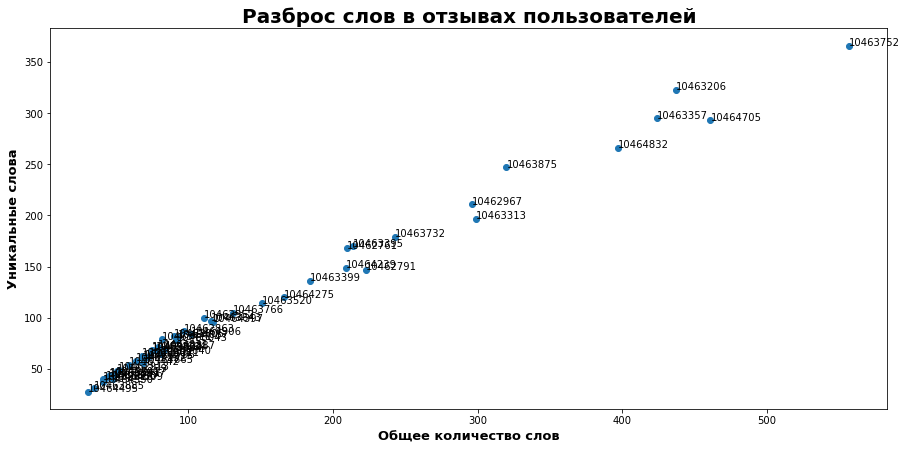

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
plt.title('Разброс слов в отзывах пользователей', fontsize=20, fontweight = 'bold')
plt.ylabel('Уникальные слова', fontsize=13, fontweight = 'bold')
plt.xlabel('Общее количество слов', fontsize=13, fontweight = 'bold')
ax.scatter(Count_words, Uniqw) 
for i, k in enumerate(df1['ID_responce']):
    ax.annotate(k, (df1['Count_words_resp'][i], df1 ['Uniq_count_words'][i]), fontsize=10)
